# Task 6: Black-box Landscape

In order to analyze an uncharted landscape, stochastic sampling combined with hypergraphs will be used.

In [1]:
# Stochastic sampling of landscape
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import random

def init_individ(num_feat):
    individual = [random.randint(0, 1) for _ in range(num_feat)]
    while individual.count(1) == 0:
        individual = [random.randint(0, 1) for _ in range(num_feat)]
    return individual

def initialize_pop(num_feat, num_individ=100):
    return [init_individ(num_feat) for _ in range(num_individ)]

# representation = [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]

def evaluate_individual(individual, X_train, X_test, y_train, y_test, epsilon=0):
    model = RandomForestClassifier(n_estimators=30, max_depth=None, criterion="gini", max_features=None, random_state=456)
    drop_cols = []
    for i, col in enumerate(X_train.columns):
        if individual[i] == 0:
            drop_cols.append(col)

    new_X_train = X_train.drop(columns=drop_cols)
    new_X_test = X_test.drop(columns=drop_cols)

    model = model.fit(new_X_train, y_train)

    y_pred = model.predict(new_X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy
    h_p = individual.count(1)
    fitness = classification_error + epsilon * h_p
    return fitness

def eval_pop(pop, X_train, X_test, y_train, y_test, epsilon=0):
    fitnesses = []
    for individual in pop:
        fitnesses.append(evaluate_individual(individual, X_train, X_test, y_train, y_test, epsilon))
    return fitnesses

## Task 1: Heart Disease

In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv("./processed.cleveland.data", header=None)

# for val in df.values:
#     print(val)  

y = df[df.columns[-1]]
X = df.drop(columns=[df.columns[-1]])

X = X.replace("?", np.nan)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = pd.DataFrame(imp_mean.fit_transform(X), columns=X.columns)

for col in X.columns:
    X[col] = X[col].astype(float)
print(X)

       0    1    2      3      4    5    6      7    8    9    10        11  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.000000   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.000000   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.000000   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.000000   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.000000   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...       ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.000000   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.000000   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.000000   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.000000   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0  0.672241   

      12  
0    6.0  
1    3.0  
2    7.0  
3    3.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
genotype_length = len(X.columns)
pop = initialize_pop(genotype_length, 2000)

fitnesses = eval_pop(pop, X_train, X_test, y_train, y_test)

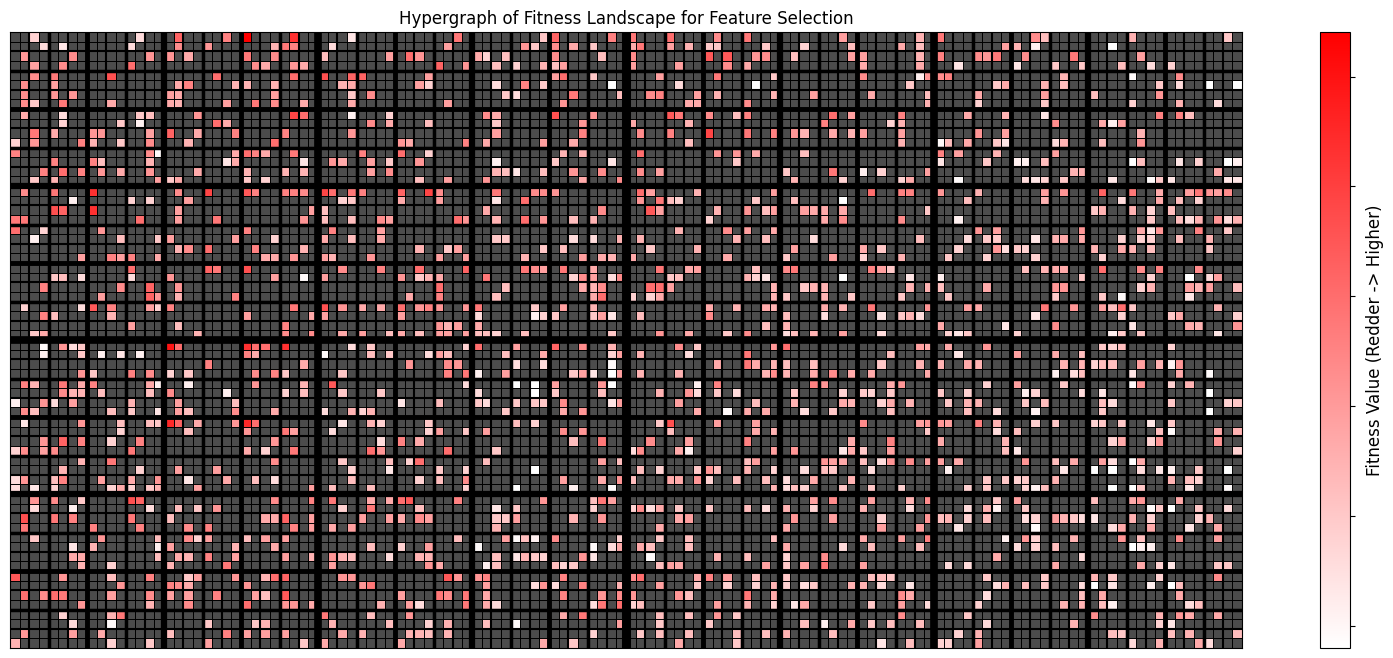

In [5]:
from landscape_analysis import produce_hypergraph_plot
import math

# Create stochastic sampled "lookup table" with the fitness

lookup_table = {}
for i in range(len(pop)):
    lookup_table["".join(map(str,pop[i]))] = fitnesses[i]

# lookup_table["0"*genotype_length] = math.inf

produce_hypergraph_plot(lookup_table, genotype_length, optima=0.389888, show_optima=True, output="heart_disease", incomplete=True, max_min="min")

## Task 2: Heart Disease

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("./zoo.data", header=None)

# for val in df.values:
#     print(val)  

y = df[df.columns[0]]
X = df.drop(columns=[df.columns[0]])

le = LabelEncoder()
y = pd.DataFrame(y)
y[0] = le.fit_transform(y[0])
# for col in X.columns:
#     X[col] = X[col].astype(float)
y = y[0]
print(X)
print(y)

     1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0     1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   1
1     1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1   1
2     0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0   4
3     1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   1
4     1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
96    1   0   0   1   0   0   0   1   1   1   0   0   2   1   0   1   1
97    1   0   1   0   1   0   0   0   0   1   1   0   6   0   0   0   6
98    1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   1
99    0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   7
100   0   1   1   0   1   0   0   0   1   1   0   0   2   1   0   0   2

[101 rows x 17 columns]
0       0
1       1
2       2
3       3
4       4
       ..
96     95
97     96
98     97
99     98
100    99
N

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
genotype_length = len(X.columns)
pop = initialize_pop(genotype_length, 4000)

fitnesses = eval_pop(pop, X_train, X_test, y_train, y_test, epsilon=1/64)

{'00101110011010111': 1.15625, '01101010101001001': 1.125, '01111110001111000': 1.15625, '10001101111010001': 1.140625, '01110101100110101': 1.15625, '10110010000011110': 1.125, '00100100101000000': 1.0625, '10110100101101000': 1.125, '01000010111110100': 1.125, '00111010010000010': 1.09375, '11010011000101000': 1.109375, '11101100001101010': 1.140625, '00111000001101111': 1.140625, '01100011001000101': 1.109375, '01100010111010010': 1.125, '01110010110101110': 1.15625, '01100101101111100': 1.15625, '10110111100010000': 1.125, '11101000100101111': 1.15625, '11010100010100001': 1.109375, '01100011010010001': 1.109375, '10110000111011010': 1.140625, '11000100101010100': 1.109375, '11010001100010110': 1.125, '01001000001001000': 1.0625, '01100111011010101': 1.15625, '10100100101011000': 1.109375, '00001010101100001': 1.09375, '10001100011000110': 1.109375, '10100100110101101': 1.140625, '11101111110001000': 1.15625, '11111001110100001': 1.15625, '10100000100010011': 1.09375, '110011011011

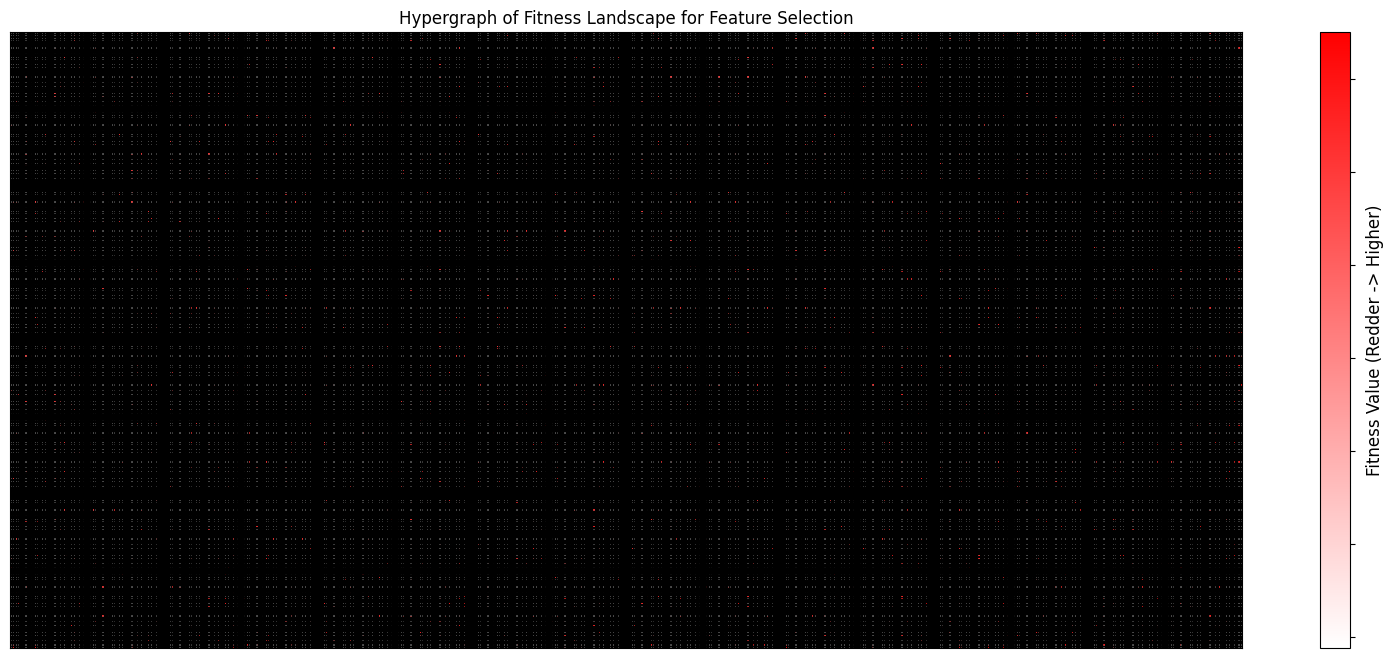

In [9]:
from landscape_analysis import produce_hypergraph_plot
import math

# Create stochastic sampled "lookup table" with the fitness

lookup_table = {}
for i in range(len(pop)):
    lookup_table["".join(map(str,pop[i]))] = fitnesses[i]

print(lookup_table)

# lookup_table["0"*genotype_length] = math.inf

produce_hypergraph_plot(lookup_table, genotype_length, optima=0.587917, show_optima=True, output="zoo", incomplete=True, max_min="min")

## Task 3: Letter Recognition

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("./letter-recognition.data", header=None)

# for val in df.values:
#     print(val)  

y = df[df.columns[0]]
X = df.drop(columns=[df.columns[0]])

le = LabelEncoder()
y = pd.DataFrame(y)
y[0] = le.fit_transform(y[0])
# for col in X.columns:
#     X[col] = X[col].astype(float)
y = y[0]
print(X)
print(y)

       1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0       2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1       5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2       4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3       7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4       2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19995   2   2   3   3   2   7   7   7   6   6   6   4   2   8   3   7
19996   7  10   8   8   4   4   8   6   9  12   9  13   2   9   3   7
19997   6   9   6   7   5   6  11   3   7  11   9   5   2  12   2   4
19998   2   3   4   2   1   8   7   2   6  10   6   8   1   9   5   8
19999   4   9   6   6   2   9   5   3   1   8   1   8   2   7   2   8

[20000 rows x 16 columns]
0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
N

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [14]:
genotype_length = len(X.columns)
pop = initialize_pop(genotype_length, 4000)

fitnesses = eval_pop(pop, X_train, X_test, y_train, y_test, epsilon=1/8)

{'0110010110010010': 1.0711666666666666, '0101111111111011': 1.6966666666666668, '0110110000110000': 1.1678333333333333, '1100010001110111': 1.2865, '0001011010111001': 1.1723333333333334, '0110101111101010': 1.3556666666666666, '0000010000011011': 0.9058333333333334, '0011001001001000': 1.0936666666666666, '0100001111001001': 1.0421666666666667, '0011011011110101': 1.3871666666666667, '1011100101010101': 1.3245, '1101000110100011': 1.1736666666666666, '0001011111100010': 1.1355, '1111011111011011': 1.71, '0010000100110001': 0.964, '1000111110100011': 1.2461666666666666, '1001001101100001': 1.1101666666666667, '0000101000000000': 1.0468333333333333, '0011000111010100': 1.0848333333333333, '0100100011001001': 1.0436666666666667, '1010110010010100': 1.1831666666666667, '1110011010111001': 1.4101666666666666, '1000010011001100': 1.0076666666666667, '0101110001111100': 1.3050000000000002, '0100110101101000': 1.0745, '1010000000111110': 1.0853333333333333, '1101000000110111': 1.246999999999

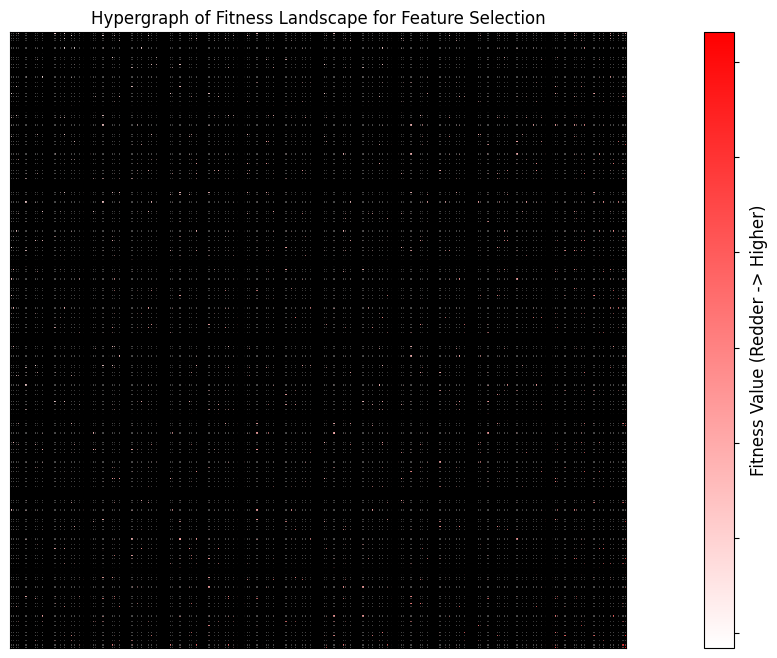

In [15]:
from landscape_analysis import produce_hypergraph_plot
import math

# Create stochastic sampled "lookup table" with the fitness

lookup_table = {}
for i in range(len(pop)):
    lookup_table["".join(map(str,pop[i]))] = fitnesses[i]

print(lookup_table)

# lookup_table["0"*genotype_length] = math.inf

produce_hypergraph_plot(lookup_table, genotype_length, optima=0.7688, show_optima=True, output="letter_recog", incomplete=True, max_min="min")